In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import (
    AbstractHolidayCalendar, DateOffset, EasterMonday,
    GoodFriday, Holiday, MO,
    next_monday, next_monday_or_tuesday)

In [2]:
power = pd.read_csv("Power-Networks-LCL.csv")
power.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent


In [3]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999971 entries, 0 to 999970
Data columns (total 6 columns):
LCLid            999971 non-null object
stdorToU         999971 non-null object
DateTime         999971 non-null object
KWh              999971 non-null float64
Acorn            999971 non-null object
Acorn_grouped    999971 non-null object
dtypes: float64(1), object(5)
memory usage: 45.8+ MB


In [4]:
power['datetime'] = pd.to_datetime(power['DateTime'])

In [5]:
#power['datetime'][0].hour

In [6]:
class EnglandAndWalesHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Years Day', month=1, day=1, observance=next_monday),
        GoodFriday,
        EasterMonday,
        Holiday('Early May bank holiday',
                month=5, day=1, offset=DateOffset(weekday=MO(1))),
        Holiday('Spring bank holiday',
                month=5, day=31, offset=DateOffset(weekday=MO(-1))),
        Holiday('Summer bank holiday',
                month=8, day=31, offset=DateOffset(weekday=MO(-1))),
        Holiday('Christmas Day', month=12, day=25, observance=next_monday),
        Holiday('Boxing Day',
                month=12, day=26, observance=next_monday_or_tuesday)
    ]

In [7]:
cal = EnglandAndWalesHolidayCalendar()
holidays = cal.holidays()
power['isHoliday'] = power['datetime'].isin(holidays)

In [8]:
power['year'] = power['datetime'].dt.year
power['month'] = power['datetime'].dt.month
power['day'] = power['datetime'].dt.day
power['weekday'] = power['datetime'].dt.weekday_name
power['dayOfyear'] = power['datetime'].dt.dayofyear
power['time'] = power['datetime'].dt.time
power['hour'] = power['datetime'].dt.hour

In [9]:
power.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped,datetime,isHoliday,year,month,day,weekday,dayOfyear,time,hour
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12 00:30:00,False,2012,10,12,Friday,286,00:30:00,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12 01:00:00,False,2012,10,12,Friday,286,01:00:00,1
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12 01:30:00,False,2012,10,12,Friday,286,01:30:00,1
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12 02:00:00,False,2012,10,12,Friday,286,02:00:00,2
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12 02:30:00,False,2012,10,12,Friday,286,02:30:00,2


In [10]:
lclid_group = power.groupby(['LCLid'])
dayofyear_group = power.groupby(['dayOfyear'])
weekday_group = power.groupby(['weekday'])
acorn_group = power.groupby(['Acorn_grouped'])
year_group = power.groupby(['year'])
month_group = power.groupby(['month'])
hour_group = power.groupby(['hour'])
holiday_group = power.groupby(['isHoliday'])

In [11]:
# print(lclid_group.mean())
# print(dayofyear_group.mean())
# print(weekday_group.mean())
# print(acorn_group.mean())

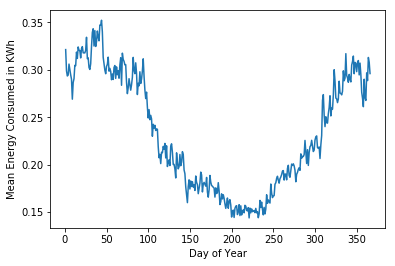

In [12]:
dayofyear_group['KWh'].mean().plot()
plt.xlabel('Day of Year')
plt.ylabel('Mean Energy Consumed in KWh')
plt.show()

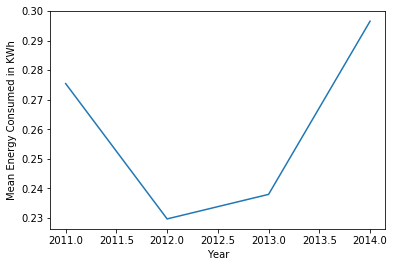

In [13]:
year_group['KWh'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Mean Energy Consumed in KWh')
plt.show()

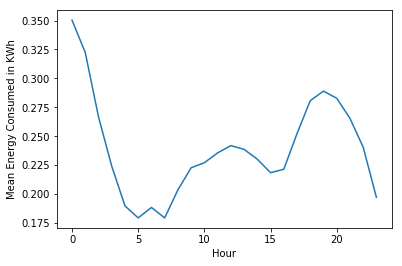

In [14]:
hour_group['KWh'].mean().plot()
plt.xlabel('Hour')
plt.ylabel('Mean Energy Consumed in KWh')
plt.show()

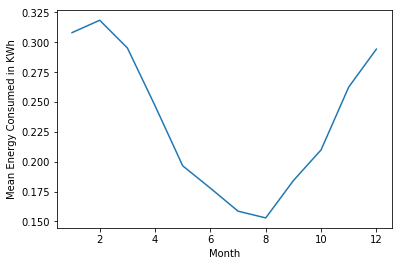

In [15]:
month_group['KWh'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Mean Energy Consumed in KWh')
plt.show()

In [16]:
# print(year_group.mean())
# print(month_group.mean())
# print(hour_group.mean())

In [17]:
print(holiday_group['KWh'].mean())

isHoliday
False    0.239518
True     0.362188
Name: KWh, dtype: float64


In [42]:
d = dict()
for house in set(power['LCLid']):
    d[house] = len(power[power['LCLid'] == house])
sorted_x = sorted(d.items(), key=lambda kv: kv[1])
print(sorted_x)

[('MAC000036', 16175), ('MAC000016', 19523), ('MAC000011', 23704), ('MAC000002', 24157), ('MAC000012', 24669), ('MAC000007', 25045), ('MAC000010', 25048), ('MAC000009', 25237), ('MAC000008', 26012), ('MAC000013', 29613), ('MAC000004', 31676), ('MAC000028', 32157), ('MAC000003', 35468), ('MAC000006', 36460), ('MAC000035', 39023), ('MAC000024', 39026), ('MAC000029', 39063), ('MAC000025', 39064), ('MAC000026', 39064), ('MAC000030', 39066), ('MAC000032', 39068), ('MAC000023', 39068), ('MAC000027', 39068), ('MAC000034', 39069), ('MAC000019', 39070), ('MAC000033', 39070), ('MAC000022', 39071), ('MAC000021', 39078), ('MAC000020', 39078), ('MAC000018', 39081)]


The Households with the highest hourly samples are:
1.MAC000018
2.MAC000020
3.MAC000021